In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def beautification():
    ax.set_facecolor('whitesmoke')
    ax.patch.set_alpha(.15)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.minorticks_on()
    plt.tick_params('both', length=8, which='major')
    plt.tick_params('both',length=3, which='minor')
    plt.grid(True, which='major', ls='dashed', alpha=.5)
    plt.grid(True, which='minor', ls='dashed', alpha=.15)

In [4]:
print type(types[0])

<type 'numpy.string_'>


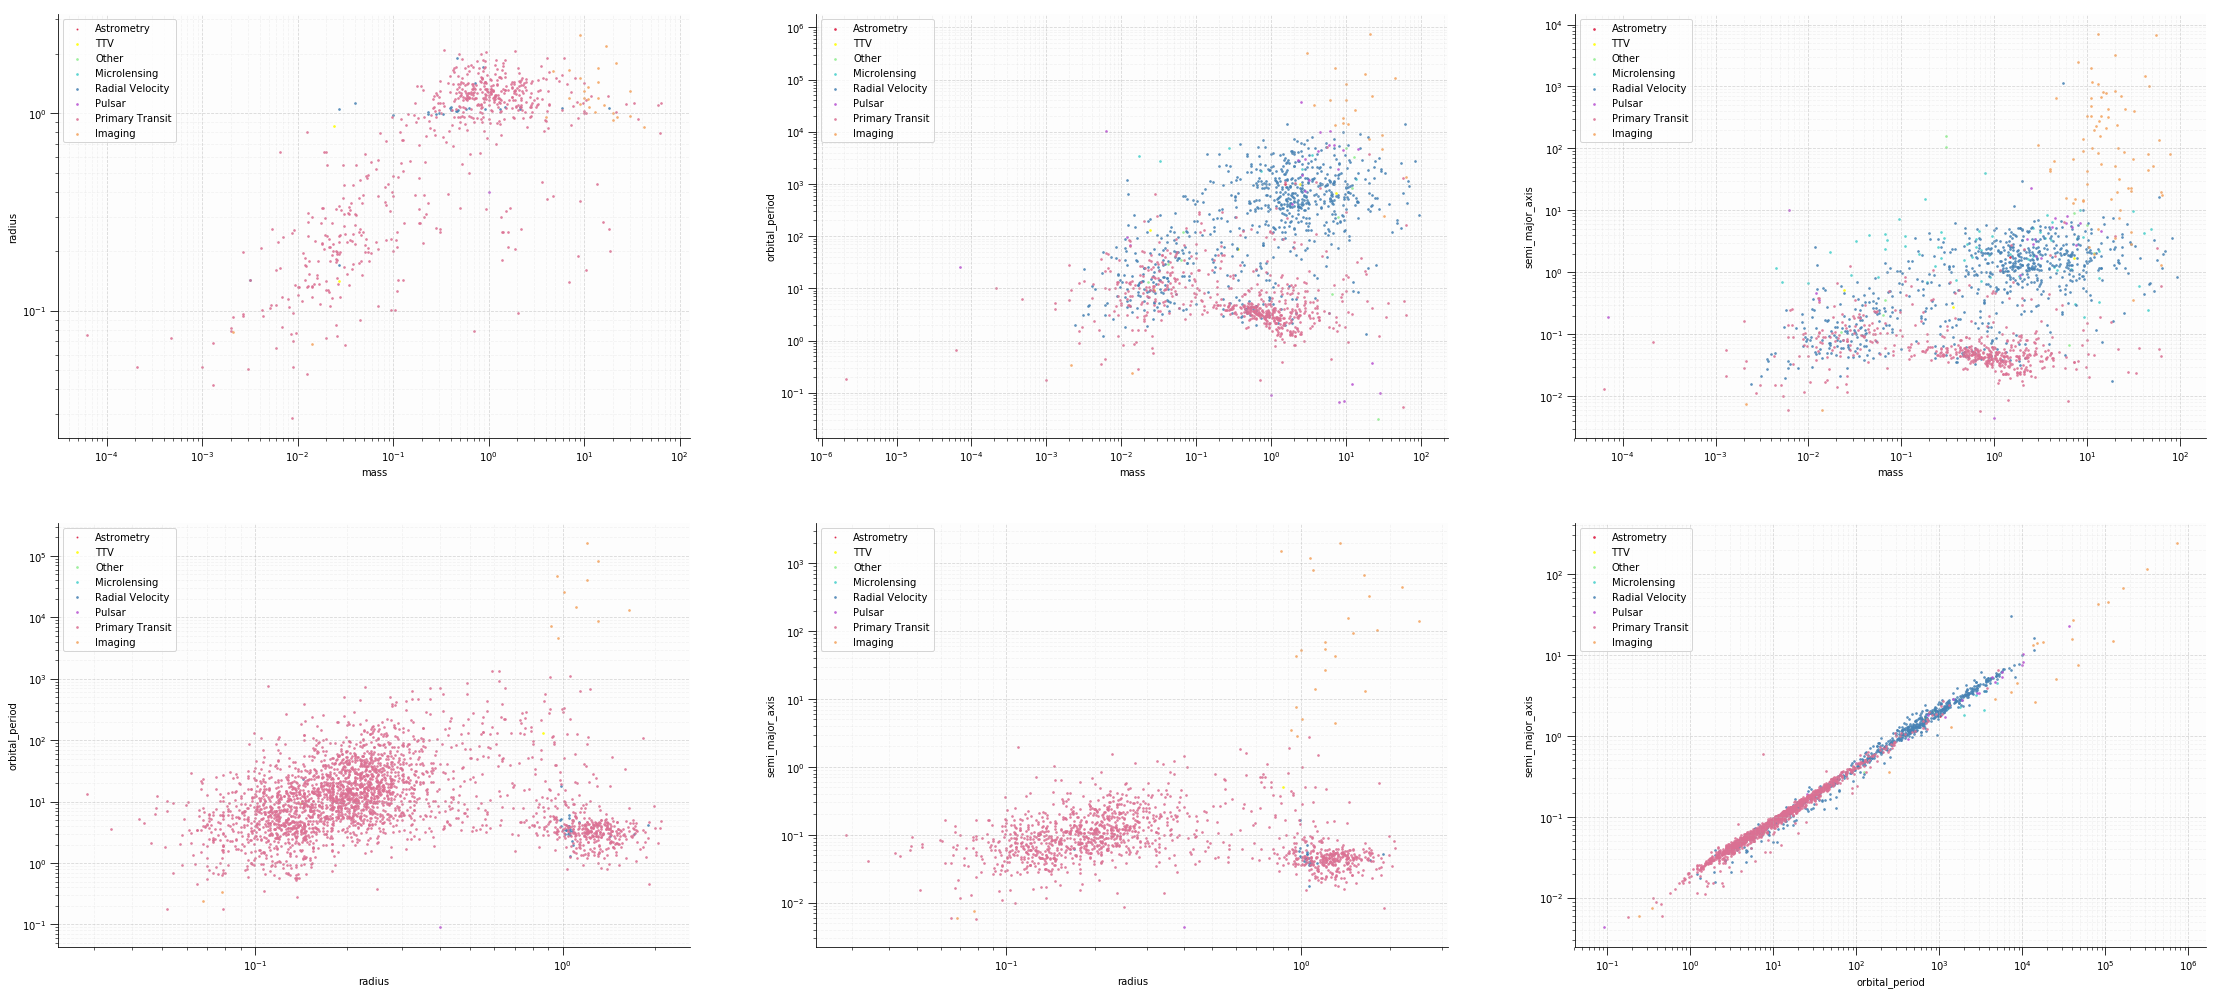

In [3]:
data = np.genfromtxt('exoplaneteu_catalog.csv',
                     skip_header=0, names=True, dtype=None,
                     delimiter=',', skip_footer=0, unpack=True);

classifier = 'detection_type'
types = list(set(data[classifier]))
parameters = ['mass', 'radius', 'orbital_period', 'semi_major_axis']

structured = dict(zip(types,[dict(zip(parameters,
                                      [data[jval][data[classifier]==ival]
                                       for j, jval in enumerate(parameters)]))
                             for i, ival in enumerate(types)]))

height_ratios = [8, 8, 8]
width_ratios = [12, 12, 12]
wspace = 1.25
hspace = 1.25
x = 0
y = 0

fig = plt.figure(figsize=(sum(width_ratios) + wspace *
                          (len(width_ratios) - 1),
                          sum(height_ratios) + hspace *
                          (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios),
                       len(width_ratios),
                       height_ratios=height_ratios,
                       width_ratios=width_ratios)

colors = [(220/255.,20/255.,60/255.), (255/255.,255/255.,0/255.),
          (144/255.,238/255.,144/255.), (72/255.,209/255.,204/255.),
          (70/255.,130/255.,180/255.), (186/255.,85/255.,211/255.),
          (219/255.,112/255.,147/255.), (244/255.,164/255.,96/255.),
          (188/255.,143/255.,143/255.), (112/255.,128/255.,144/255.)]

fig.suptitle('', fontsize=20)
location = 0
for i, ival in enumerate(parameters):
    for j, jval in enumerate(parameters):
        if i != j and j > i:
            ax = fig.add_subplot(gs[location])
            for k, kval in enumerate(types):
                ax.scatter(structured['{}'.format(kval)]['{}'.format(ival)],
                           structured['{}'.format(kval)]['{}'.format(jval)],
                           facecolors=colors[k], s = 3, alpha=.75, label='{}'.format(kval))
                ax.legend(loc='best')
                ax.update({'title': '',
                           'ylabel': '{}'.format(jval),
                           'xlabel': '{}'.format(ival),
                           'xscale': 'log', 'yscale': 'log'})
                beautification()
            location += 1

plt.savefig('fig.png', dpi=60)
plt.show()

In [ ]:
height_ratios = [5, 3, 3]
width_ratios = [9, 9]
wspace = .5
hspace = 1.25
markersize = 3
fig = plt.figure(figsize=(sum(width_ratios) + wspace *
                          (len(width_ratios) - 1),
                          sum(height_ratios) + hspace *
                          (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios),
                       len(width_ratios),
                       height_ratios=height_ratios,
                       width_ratios=width_ratios)


    

fig.suptitle('', fontsize=20)
ax = fig.add_subplot(gs[0,0])
ax.scatter(data['mass'][data['detection_type']=='Radial Velocity'],
           data['radius'][data['detection_type']=='Radial Velocity'],
           c='red',marker='o', alpha='.75', s = markersize, label='Radial Velocity')
ax.scatter(data['mass'][data['detection_type']=='Primary Transit'],
           data['radius'][data['detection_type']=='Primary Transit'],
           c='navy',marker='o',alpha='.25', s = markersize, label='Transit')
ax.scatter(data['mass'][data['detection_type']=='Imaging'],
           data['radius'][data['detection_type']=='Imaging'],
           c='green',marker='o',alpha='.5', s = markersize, label='Imaging')
ax.scatter(data['mass'][data['detection_type']=='Pulsar'],
           data['radius'][data['detection_type']=='Pulsar'],
           c='yellow',marker='o',alpha='.75', s = markersize, label='Pulsar')
beautification()
plt.legend(loc='best')
ax.set_xlim(1e-4,1e3)
ax.set_ylim(1e-2,1e1)
ax.update({'title': 'Planet Mass vs Radius',
           'xlabel': 'Radius', 'ylabel': 'Planet Mass',
           'xscale': 'log', 'yscale': 'log'})

ax = fig.add_subplot(gs[0,1])
ax.scatter(data['mass'][data['detection_type']=='Radial Velocity'],
           data['star_mass'][data['detection_type']=='Radial Velocity'],
           c='red',marker='o', alpha='.25', s = markersize, label='Radial Velocity')
ax.scatter(data['mass'][data['detection_type']=='Primary Transit'],
           data['star_mass'][data['detection_type']=='Primary Transit'],
           c='navy',marker='o',alpha='.25', s = markersize, label='Transit')
ax.scatter(data['mass'][data['detection_type']=='Imaging'],
           data['star_mass'][data['detection_type']=='Imaging'],
           c='green',marker='o',alpha='.5', s = markersize, label='Imaging')
ax.scatter(data['mass'][data['detection_type']=='Pulsar'],
           data['star_mass'][data['detection_type']=='Pulsar'],
           c='yellow',marker='o',alpha='.75', s = markersize, label='Pulsar')
beautification()
ax.set_xlim(1e-4,1e3)
ax.set_ylim(1e-2,1e1)
ax.update({'title': 'Planet Mass vs Star Mass',
           'xlabel': 'Star Mass', 'ylabel': '',
           'xscale': 'log', 'yscale': 'log'})

ax = fig.add_subplot(gs[1,:])
ax.hist(data['mass'][~np.isnan(data['mass'])], color='lightgrey', alpha=.5, bins=29)
ax.hist((data['mass'][data['detection_type']=='Radial Velocity'],
         data['mass'][data['detection_type']=='Primary Transit'],
         data['mass'][data['detection_type']=='Imaging'],
         data['mass'][data['detection_type']=='Pulsar']),
        alpha=.5, color=('red','navy','green','yellow'), bins=20)
ax.update({'title': '',
           'xlabel': 'Mass', 'ylabel': 'Number of Planets',
           'yscale': 'log'})
beautification()
ax.set_ylim(0,1e4)

ax = fig.add_subplot(gs[2,:])
ax.hist(data['discovered'][~np.isnan(data['discovered'])], color='lightgrey', alpha=.5, bins=29)
ax.hist((data['discovered'][data['detection_type']=='Radial Velocity'],
         data['discovered'][data['detection_type']=='Primary Transit'],
         data['discovered'][data['detection_type']=='Imaging'],
         data['discovered'][data['detection_type']=='Pulsar']),
        alpha=.5, color=('red','navy','green','yellow'), bins=29)
ax.update({'title': '',
           'xlabel': 'Year', 'ylabel': 'Number of Planets Detected',
           'yscale': 'log'})
beautification()
ax.set_ylim(0,1e4)

plt.savefig('exoplanetdata.png', dpi=60)
plt.show()

In [ ]:
data = np.genfromtxt('exoplaneteu_catalog.csv', skip_header=0, names=True, dtype=None, delimiter=',', skip_footer=0, unpack=True);

In [ ]:
print max(data[colornames[4]][~np.isnan(data[colornames[4]])])